In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from google.colab import files
#importing preliminary packages

In [ ]:
uploaded = files.upload()
#loading in file

Saving prognosis_and_symptoms.csv to prognosis_and_symptoms.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['prognosis_and_symptoms.csv']), engine='python', sep=';', header=0, index_col=None, skip_blank_lines=False)
#parsing ";" instead of defualt "," for the header

In [ ]:
data['symptoms'].str.split(',', expand=False)
#parsing the rest of the symptom labels with "," as the delimiter

0       [itching, skin_rash, nodal_skin_eruptions, dis...
1       [itching, skin_rash, nodal_skin_eruptions, dis...
2       [itching, skin_rash, nodal_skin_eruptions, dis...
3       [itching, skin_rash, nodal_skin_eruptions, dis...
4       [skin_rash, nodal_skin_eruptions, dischromic _...
                              ...                        
5357    [vomiting, weakness_of_one_body_side, altered_...
5358    [vomiting, yellowish_skin, nausea, loss_of_app...
5359    [fatigue, cramps, bruising, obesity, swollen_l...
5360    [itching, skin_rash, nodal_skin_eruptions, dis...
5361    [vomiting, yellowish_skin, dark_urine, nausea,...
Name: symptoms, Length: 5362, dtype: object

In [ ]:
labels = data['prognosis']
#setting up disease labels

In [ ]:
symptoms = data['symptoms']
symptoms.str.split(',', expand=False)
#setting up symptoms labels

0       [itching, skin_rash, nodal_skin_eruptions, dis...
1       [itching, skin_rash, nodal_skin_eruptions, dis...
2       [itching, skin_rash, nodal_skin_eruptions, dis...
3       [itching, skin_rash, nodal_skin_eruptions, dis...
4       [skin_rash, nodal_skin_eruptions, dischromic _...
                              ...                        
5357    [vomiting, weakness_of_one_body_side, altered_...
5358    [vomiting, yellowish_skin, nausea, loss_of_app...
5359    [fatigue, cramps, bruising, obesity, swollen_l...
5360    [itching, skin_rash, nodal_skin_eruptions, dis...
5361    [vomiting, yellowish_skin, dark_urine, nausea,...
Name: symptoms, Length: 5362, dtype: object

In [ ]:
unique_symptoms = pd.unique(symptoms.str.split(',', expand=True).values.ravel('K'))
unique_prognosis = pd.unique(labels)
#gathering unique symptoms and prognoses

In [ ]:
data_onehot = pd.DataFrame(np.zeros((len(symptoms), len(unique_symptoms))), columns = unique_symptoms)
#setting up one-hot encoding dataframe

In [ ]:
for i in range(0, len(symptoms)):
  s = symptoms[i].split(',')
  for k in range(0, len(s)):
    data_onehot.at[i, s[k]] = 1
  #one-hot encoding done on the date_onehot dataframe

In [ ]:
print(len(unique_symptoms))
print(len(unique_prognosis))
#printing both unique numbers for initial data analysis

132
41


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data_onehot, labels, test_size = 0.2, stratify=labels)

#80-20 train-test split on the data

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.90)

pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print(pca.n_components_)
print(pca.explained_variance_ratio_)
#performing principle component analysis

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,


33
[0.12502821 0.09619267 0.0638624  0.06224151 0.05280916 0.03836588
 0.03676896 0.03315115 0.03139994 0.02823606 0.02536739 0.02410349
 0.02354658 0.02217121 0.01969318 0.01890668 0.01843113 0.0161199
 0.0153426  0.01495502 0.01488442 0.01334058 0.01327438 0.01249648
 0.0118996  0.01092389 0.00985658 0.00948021 0.00897775 0.008513
 0.00798246 0.00754897 0.00685759]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 15, 2)}

tree = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=5)

tree.fit(X_train, y_train)
#performing grid search on decision tree

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15, 2)},
             verbose=1)

In [ ]:
print(tree.best_estimator_)

y_pred_train = tree.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

y_pred_test = tree.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
#priting accuracy score of grid searched decision tree

DecisionTreeClassifier(criterion='entropy', max_depth=11)
Train Accuracy: 0.9391466542317557
Test Accuracy: 0.9263746505125815


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_params = {'n_neighbors': range(5, 20)}
knn = GridSearchCV(KNeighborsClassifier(p=2, metric='minkowski'), knn_params, verbose=1, cv=5)
knn.fit(X_train, y_train)
#performing gridsearch with k Nearest Neighbors

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 20)}, verbose=1)

In [ ]:
print(knn.best_estimator_)

y_pred_train_knn = knn.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_knn))

y_pred_test_knn = knn.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_knn))
#printing accuracy score of grid searched k Nearest Neighbors

KNeighborsClassifier(n_neighbors=9)
Train Accuracy: 0.9386803450687806
Test Accuracy: 0.9263746505125815


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data_onehot, labels, test_size = 0.2, stratify=labels)
#resplitting the data to train the models without PCA

In [ ]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 15, 2)}

tree = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=5)
tree.fit(X_train, y_train)
#girsearch on decision trees without PCA

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15, 2)},
             verbose=1)

In [ ]:
import time
print(tree.best_estimator_)

start = time.time()
print(len(X_train))
y_pred_train = tree.predict(X_train)
stop = time.time()

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

y_pred_test = tree.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
#printing test and train accuracy of decision tree

DecisionTreeClassifier(criterion='entropy', max_depth=13)
4289
Train Accuracy: 0.9116344136162275
Test Accuracy: 0.8946877912395154


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
knn_params = {'n_neighbors': range(5, 20)}
knn = GridSearchCV(KNeighborsClassifier(p=2, metric='minkowski'), knn_params, verbose=1, cv=5)
knn.fit(X_train, y_train)
#reperforming grisearch on k Nearest Neighbors without PCA

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 20)}, verbose=1)

In [ ]:

print(knn.best_estimator_)

start = time.time()
print(len(X_train))
y_pred_train_knn = knn.predict(X_train)
stop = time.time()
print(f"Training time: {stop - start}s")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_knn))

y_pred_test_knn = knn.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_knn))
#printing test and train accuracy on grid searched knn prediction

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsClassifier(n_neighbors=11)
4289
Training time: 0.6659133434295654s
Train Accuracy: 0.937048262998368
Test Accuracy: 0.9338303821062441


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
array = multilabel_confusion_matrix(y_test, y_pred_test_knn)
confusion_matrix = np.zeros(shape=(2,2))
confusion_matrix[0][0] = 0
confusion_matrix[1][0] = 0
confusion_matrix[0][1] = 0
confusion_matrix[1][1] = 0
for i in array:
  confusion_matrix[0][0] += i[0][0]
  confusion_matrix[1][0] += i[1][0]
  confusion_matrix[0][1] += i[0][1]
  confusion_matrix[1][1] += i[1][1]

TP = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TN = confusion_matrix[1][1]

sensitvity = TP / (TP + FN)
specificity = TN / (TN + FP)

balanced_accuracy = (sensitvity + specificity) / 2
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1score = (2 * recall * precision) / (recall + precision)

print("Balanced Accuracy:", balanced_accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1score*100)
#generating multiclass confusion matrix
#calculating and printing the efficacy scores of k Nearest Neighbors

Balanced Accuracy: 96.60880708294502
Precision: 99.83457595526562
Recall: 99.83457595526562
F1 Score: 99.83457595526562


In [ ]:
#efficacy metric for decision trees
array = multilabel_confusion_matrix(y_test, y_pred_test)
confusion_matrix = np.zeros(shape=(2,2))
confusion_matrix[0][0] = 0
confusion_matrix[1][0] = 0
confusion_matrix[0][1] = 0
confusion_matrix[1][1] = 0
for i in array:
  confusion_matrix[0][0] += i[0][0]
  confusion_matrix[1][0] += i[1][0]
  confusion_matrix[0][1] += i[0][1]
  confusion_matrix[1][1] += i[1][1]

TP = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TN = confusion_matrix[1][1]

sensitvity = TP / (TP + FN)
specificity = TN / (TN + FP)

balanced_accuracy = (sensitvity + specificity) / 2
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1score = (2 * recall * precision) / (recall + precision)

print("Balanced Accuracy:", balanced_accuracy*100)
print("Precision:", precision*100)
print("Recall:", recall*100)
print("F1 Score:", f1score*100)
#generating multiclass confusion matrix
#calculating and printing the efficacy scores of k Nearest Neighbors

Balanced Accuracy: 94.60274930102517
Precision: 99.73671947809879
Recall: 99.73671947809879
F1 Score: 99.73671947809879


In [ ]:

average_vector = pd.DataFrame(np.zeros((len(unique_prognosis), len(unique_symptoms))), index = unique_prognosis, columns = unique_symptoms)
sum_vector = pd.DataFrame(np.zeros((len(unique_prognosis), 1)), index = unique_prognosis, columns = ['Count'])
#creating average sum vector dataframes

In [ ]:
sum_vector
for index, row in data_onehot.iterrows():
  sum_vector.loc[labels[index]] += 1
  for label, content in row.items():
    if (content == 1.0):
      average_vector.loc[labels[index]].loc[label] += 1
  #summing in vector

In [ ]:
for index, row in average_vector.iterrows():
  for label, content in row.items():
    if sum_vector.loc[index].loc["Count"] != 0:
      average_vector.loc[index].loc[label] /= sum_vector.loc[index].loc["Count"]
#averaging in vector

In [ ]:
sum_vector.sort_values(by=["Count"], ascending=False)
#sort sum_vector by count metric

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init='k-means++')

km.fit(average_vector)
#fitting with the average vector

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=3)

In [ ]:
distortions = []
for i in range(1, 41):
    km = KMeans(n_clusters=i,
                init='k-means++',   #now we are using k-means++
                n_init=4,
                max_iter=300,
                random_state=0)
    km.fit(average_vector)
    distortions.append(km.inertia_)
plt.plot(range(1, 41), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("Distortion Elbow Chart")
plt.tight_layout()
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.show()
#created elbow chart


In [ ]:
import numpy as np
from matplotlib import cm

from sklearn.metrics import silhouette_samples #silhouette coefficients

silhouettes = []

for i in range(2, 40):
    km = KMeans(n_clusters=i,
                init='k-means++',   #now we are using k-means++
                n_init=4,
                max_iter=300,
                random_state=0)
    y_km = km.fit_predict(average_vector)
    silhouette_vals = silhouette_samples(average_vector, y_km, metric='euclidean') #get the silhouette coefficients of each cluster
    silhouette_avg = np.mean(silhouette_vals)
    silhouettes.append(silhouette_avg)

plt.plot(range(2, 40), silhouettes, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Avg.')
plt.tight_layout()
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.title("Elbow Chart")
plt.show()
#created eblow chart

In [ ]:
km = KMeans(n_clusters=6,
                init='k-means++',   #now we are using k-means++
                n_init=10,
                max_iter=300,
                random_state=0)
y_km = km.fit_predict(average_vector)

pca = PCA(3)

pca.fit(average_vector)

pca_average_vector = pca.transform(average_vector)

print(pca.explained_variance_ratio_)
#printing variance ratio

[0.13555084 0.10501709 0.0714297 ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,


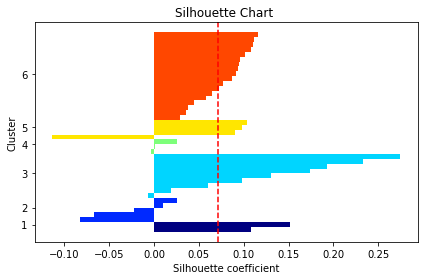

In [ ]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(average_vector, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.title("Silhouette Chart ")
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()
#silhouette chart

In [ ]:
color_options = ['r', 'g', 'b', 'c', 'm', 'y']
classes = [[], [], [], [], [], []]

for k in range(0,len(pca_average_vector)):
  i = y_km[k]
  print(unique_prognosis[k] + " in cluster " + str(i + 1))
  classes[i].append(pca_average_vector[k].tolist())

data = []
for l in classes:
  data.append(np.array(l))

#creating different colors for clustering

Fungal infection in cluster 6
AIDS in cluster 6
GERD in cluster 6
Jaundice in cluster 3
Chronic cholestasis in cluster 3
Allergy in cluster 6
Drug Reaction in cluster 6
Varicose veins in cluster 6
Hypertension  in cluster 2
Hypothyroidism in cluster 2
Gastroenteritis in cluster 6
Diabetes  in cluster 4
Tuberculosis in cluster 5
Paralysis (brain hemorrhage) in cluster 6
Peptic ulcer diseae in cluster 6
Migraine in cluster 6
Cervical spondylosis in cluster 2
Malaria in cluster 6
Hepatitis B in cluster 3
Typhoid in cluster 3
Pneumonia in cluster 5
Dengue in cluster 1
Chicken pox in cluster 1
Bronchial Asthma in cluster 5
Alcoholic hepatitis in cluster 3
Common Cold in cluster 5
Hepatitis C in cluster 3
Acne in cluster 6
Hyperthyroidism in cluster 4
Hepatitis D in cluster 3
Heart attack in cluster 6
Osteoarthristis in cluster 2
Hypoglycemia in cluster 4
hepatitis A in cluster 3
Dimorphic hemmorhoids(piles) in cluster 6
Arthritis in cluster 6
Hepatitis E in cluster 3
Urinary tract infection

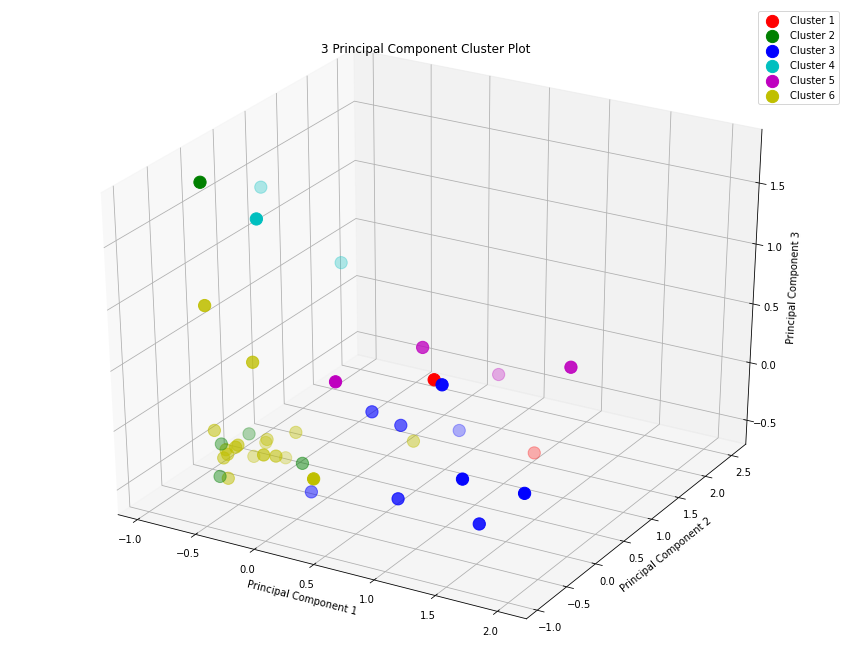

In [ ]:
fig = plt.figure(figsize=(15, 12))

ax = fig.add_subplot(111, projection='3d')
# convert classes to a numpy array.
# c needs to be the list of colors for each point
for i in range(0, len(data)):
  ax.scatter(
      data[i][:, 0], data[i][:, 1], data[i][:, 2],
      c=color_options[i], s=150, marker="o", label = "Cluster " + str(i + 1))


ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title("3 Principal Component Cluster Plot")
ax.legend()
plt.show()
#clustering with the three principle components

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['NoneType', 'str']. An error will be raised in 1.2.
  FutureWarning,


Text(0.5, 1.0, '2 Principle Component Cluster Plot')

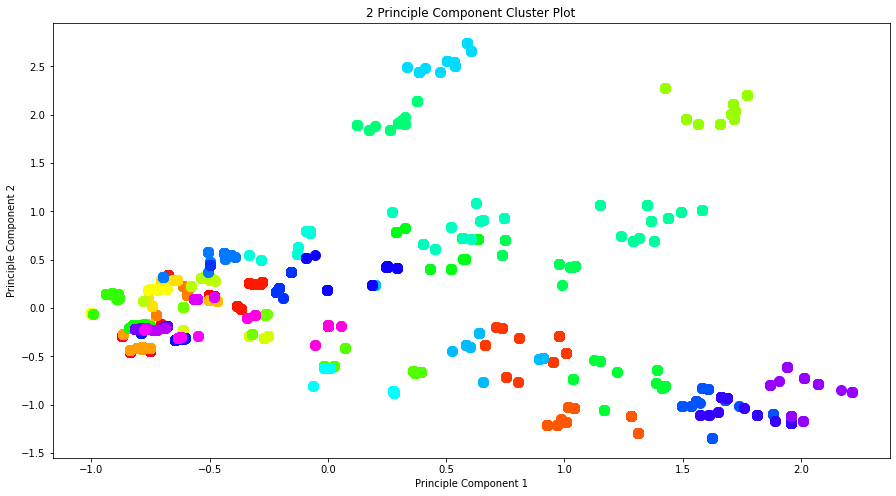

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
cm = plt.get_cmap('gist_rainbow')

out = knn.predict(X_train)
pca = PCA(2)
pca.fit(X_train)
two_d_data = pca.transform(X_train)

prediction = {}
prediction_reverse = {}
for i in out:
  for k in range(0, 41):
    if (unique_prognosis[k] == i):
      prediction[i] = k
      prediction_reverse[k] = i

diseases = []
for i in range(0, len(unique_prognosis)):
  diseases.append([])

for k in range(0, len(out)):
  i = prediction[out[k]]
  diseases[i].append([two_d_data[k,0], two_d_data[k,1]])

data = []
for l in diseases:
  data.append(np.array(l))

ax.set_prop_cycle('color', [cm(1.*i/len(unique_prognosis)) for i in range(len(unique_prognosis))])
for i in range(0, len(data)):
  ax.scatter(data[i][:, 0],data[i][:, 1],
              label=prediction_reverse[i],
              s=100)


ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')
ax.set_title("2 Principle Component Cluster Plot")
#ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
#created another cluster plot with two principle components